# Machine Learning Project

Kathia Zamora Arias <kattia.zamora@prodigious.com><br />
Alejandro Madrigal Leival <me@alemadlei.tech>

In [205]:
# All dependencies go here
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [206]:
# Description
# LIMIT_BAL: Credit in Taiwan dollars.
# SEX: 
#   1 => Male
#   2 => Female
# EDUCATION: 
#   1 => Graduate School
#   2 => University
#   3 => High School
#   4 => Others
# MARRIAGE:
#   1 => Married
#   2 => Single
#   3 => Other
# AGE: Age
# PAY_0: Payment status for September 2005
# PAY_2: Payment status for August 2005
# PAY_3: Payment status for July 2005
# PAY_4: Payment status for June 2005
# PAY_5: Payment status for May 2005
# PAY_6: Payment status for April 2005
# - All of these have the following possible values
#   -1 => Pay duly
#    1 => One month payment delay
#    2 => Two months payment delay
#    . => . months payment delay
#    9 => Nine months or month payment delay.
# BILL_AMT1: Bill statement amount for September 2005.
# BILL_AMT2: Bill statement amount for August 2005.
# BILL_AMT3: Bill statement amount for July 2005.
# BILL_AMT4: Bill statement amount for June 2005.
# BILL_AMT5: Bill statement amount for May 2005.
# BILL_AMT6: Bill statement amount for April 2005.
# - All of these values are in Taiwan dollars.
# PAY_AMT1: Amount of previous payment for September 2005.
# PAY_AMT2: Amount of previous payment for August 2005.
# PAY_AMT3: Amount of previous payment for July 2005.
# PAY_AMT4: Amount of previous payment for June 2005.
# PAY_AMT5: Amount of previous payment for May 2005.
# PAY_AMT6: Amount of previous payment for April 2005.
# default payment next month: Indicates if the next month (October 2005) will be a default payment month.

# Loads and cleans up our dataset (first row in this case is the second one).
data = pd.read_csv('default_credit.csv', header=1);
data = data.astype('int32')
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## Descriptive Statistics (use charts, graphics and tables as needed) 

### 1 - Display graphics about payments made between sept 2005 and April 2005. Display and explain any important finding. (5 pts)

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

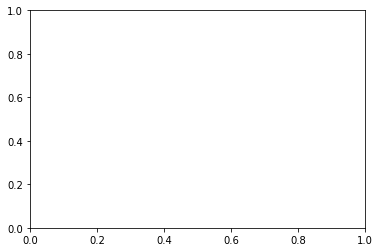

In [278]:
# General comparison between the billing statement and the payment in general.
for i in range(1, 7):
    plt.hist(data[['EDUCATION', 'PAY_AMT' + str(i), 'BILL_AMT' + str(i)]].groupby('EDUCATION'))


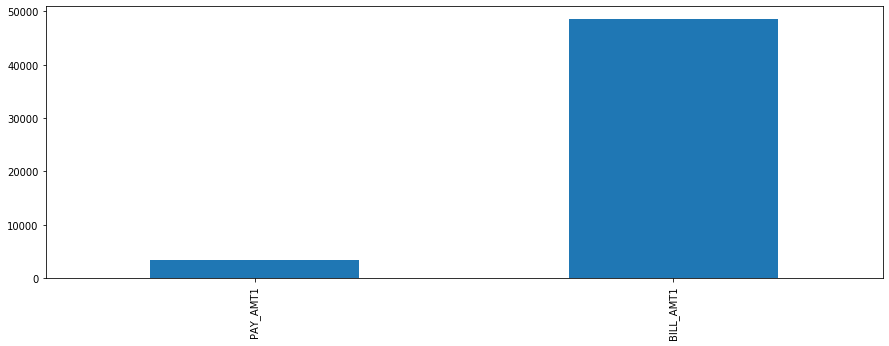

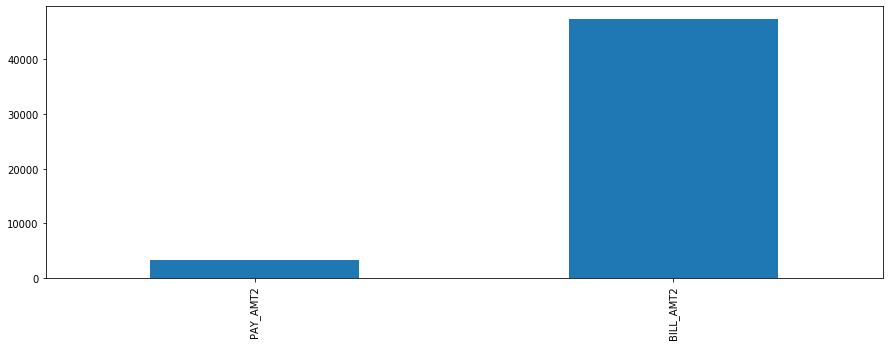

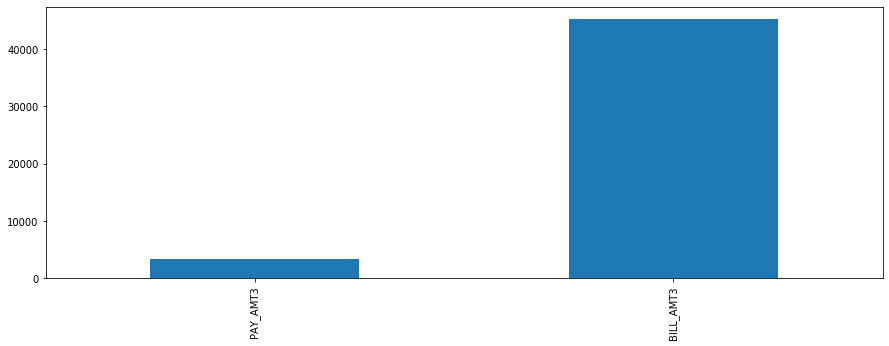

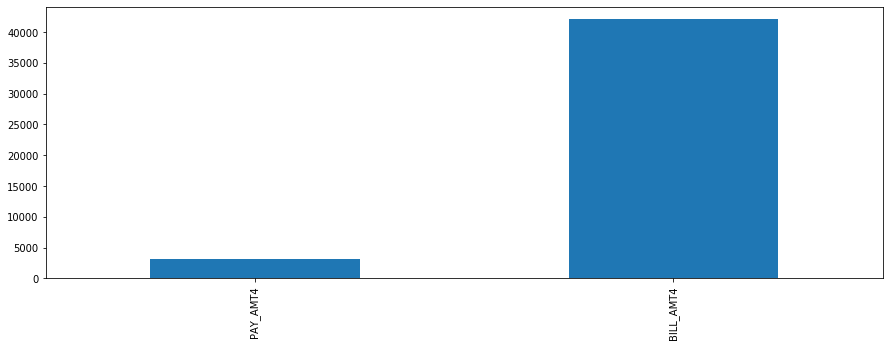

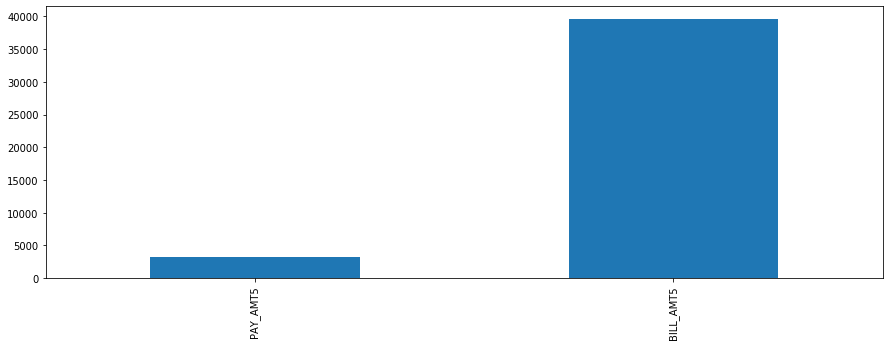

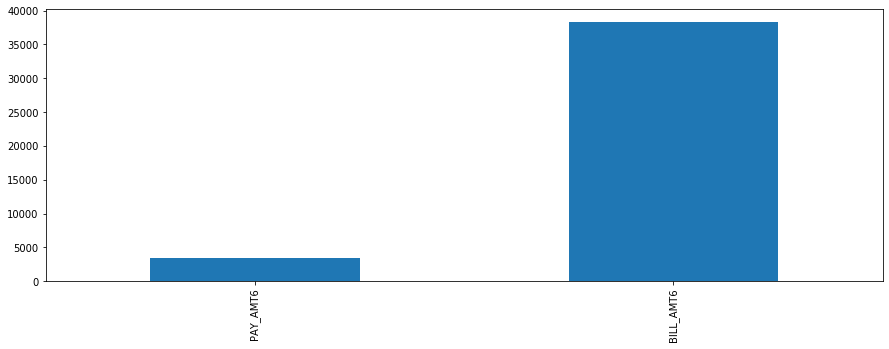

In [236]:
for i in range(1, 7):
    payments_data = data[['PAY_AMT' + str(i), 'BILL_AMT' + str(i)]].loc[data['default payment next month'] == 1]
    payments_data.mean().plot(kind='bar', figsize=(15,5))
    plt.show()

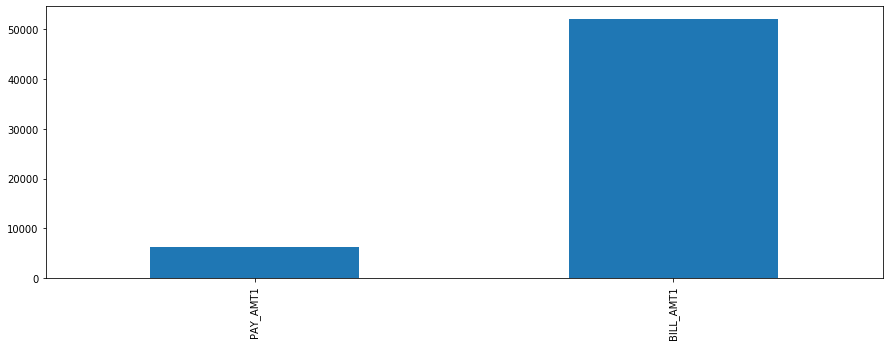

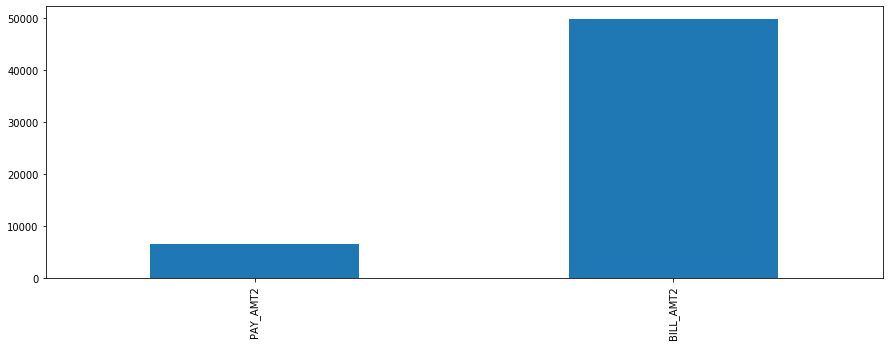

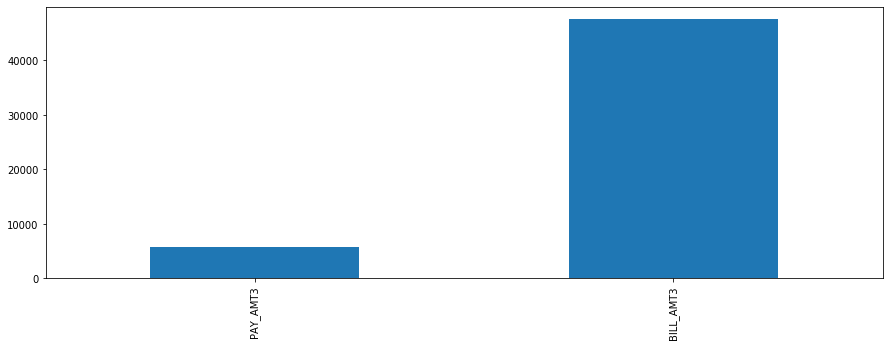

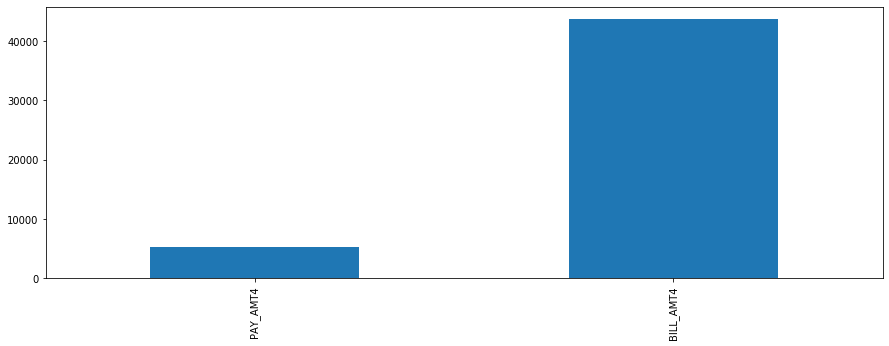

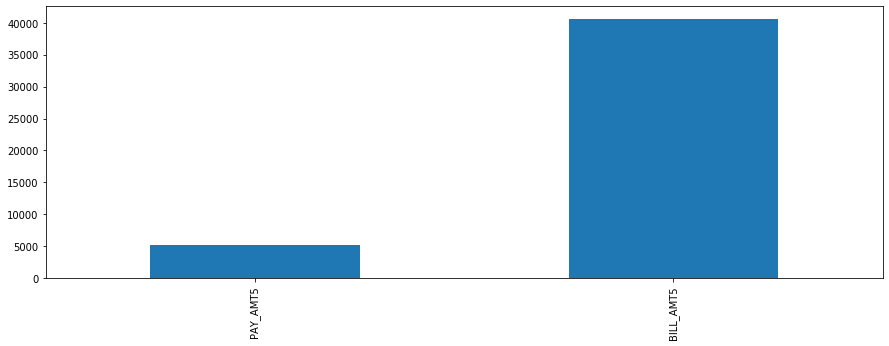

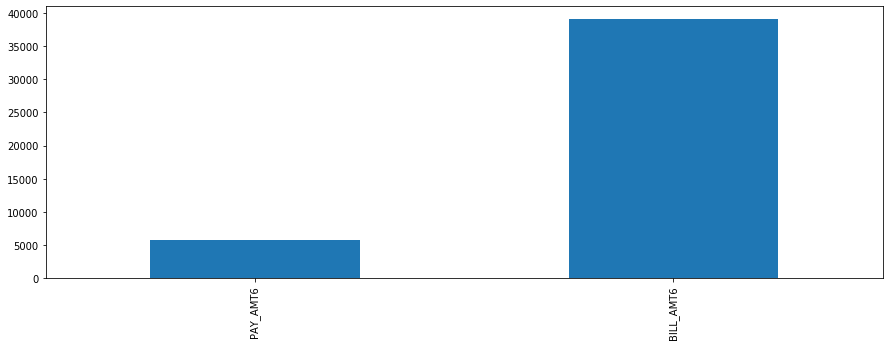

In [215]:
for i in range(1, 7):
    payments_data = data[['PAY_AMT' + str(i), 'BILL_AMT' + str(i)]].loc[data['default payment next month'] == 0]
    payments_data.mean().plot(kind='bar', figsize=(15,5))
    plt.show()

### 2 - What is the average amount we lend our customers? (use a box plot) (5 pts)

In [179]:
# This can be obtained multiple ways. We just describe the data to see all things that might be relevant.
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


#### From the initial dataset describe we observe that the mean amount is NT$ 167484.322667

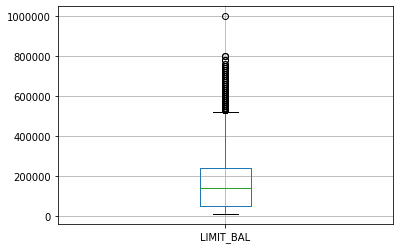

In [180]:
# However, plotting the data using boxplot we get the following.
data[['LIMIT_BAL']].boxplot()

In [181]:
# Which basically tells us that there are some noticeable outliers above a specific value.
# Just for evaluation purposes we define a separator value here. 
limitValue = 500000

# We separate this data into two groups. First the one that has 
underLimitValue = data.loc[data['LIMIT_BAL'] < limitValue][['LIMIT_BAL']]
underLimitValue.describe()

,LIMIT_BAL
count,29072.00000
mean,156172.93891
std,114631.76685
min,10000.00000
25%,50000.00000
50%,130000.00000
75%,230000.00000
max,490000.00000


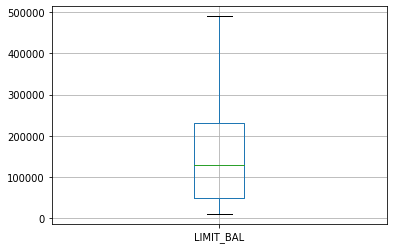

In [182]:
underLimitValue[['LIMIT_BAL']].boxplot()

In [183]:
overLimitValue = data.loc[data['LIMIT_BAL'] >= limitValue];
overLimitValue.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,...,928.000000,928.000000,928.000000,928.000000,9.280000e+02,928.000000,928.000000,928.000000,928.000000,928.000000
mean,15156.417026,521842.672414,1.548491,1.520474,1.445043,39.433190,-0.491379,-0.622845,-0.610991,-0.591595,...,95010.887931,88393.640086,86036.294181,15601.220905,2.178710e+04,18984.580819,15556.711207,18161.565733,20216.633621,0.112069
std,8801.019138,54590.255918,0.497911,0.748685,0.501559,8.270629,1.033386,0.969878,0.956761,0.915063,...,135590.065268,129068.002111,125170.454542,33423.121231,8.009591e+04,50498.871341,32979.835233,42125.101015,48450.435917,0.315621
min,7.000000,500000.000000,1.000000,1.000000,1.000000,23.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-4729.000000,-10505.000000,-39046.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7175.250000,500000.000000,1.000000,1.000000,1.000000,33.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,5402.250000,4565.750000,3404.250000,2011.250000,2.000000e+03,1566.500000,1150.000000,1456.500000,1584.000000,0.000000
50%,14464.500000,500000.000000,2.000000,1.000000,1.000000,38.000000,0.000000,0.000000,0.000000,0.000000,...,30814.000000,28905.000000,26753.500000,6500.500000,7.413000e+03,6443.500000,5482.000000,5303.500000,6073.500000,0.000000
75%,23332.750000,500000.000000,2.000000,2.000000,2.000000,45.000000,0.000000,0.000000,0.000000,0.000000,...,130190.000000,117332.500000,118563.000000,16655.500000,1.750375e+04,15889.750000,15000.000000,15033.750000,16684.000000,0.000000
max,29964.000000,1000000.000000,2.000000,6.000000,3.000000,73.000000,8.000000,7.000000,6.000000,5.000000,...,891586.000000,927171.000000,961664.000000,493358.000000,1.684259e+06,896040.000000,528897.000000,426529.000000,528666.000000,1.000000


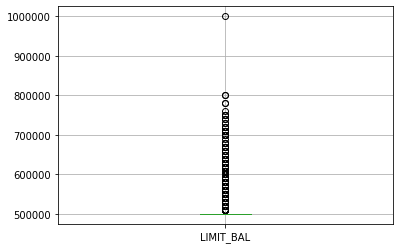

In [184]:
overLimitValue[['LIMIT_BAL']].boxplot()

### 3 - Which gender is more prone to default payment? (5 pts)

In [185]:
# Information for male.
data.loc[data['SEX'] == 1].loc[data['default payment next month'] == 1]['ID'].count()

2873

In [186]:
# Information for female.
data.loc[data['SEX'] == 2].loc[data['default payment next month'] == 1]['ID'].count()

3763

#### Based on the final results, females are more prone to default payment.

### 4 - Are single men more prone to default payments than married men? (5 pts)

In [187]:
# Information for married men.
data.loc[data['SEX'] == 1].loc[data['default payment next month'] == 1].loc[data['MARRIAGE'] == 1]['ID'].count()

1346

In [188]:
# Information for single men.
data.loc[data['SEX'] == 1].loc[data['default payment next month'] == 1].loc[data['MARRIAGE'] == 2]['ID'].count()

1485

#### That is indeed correct, single men are more prone to default payment compared to married men.

In [189]:
# Now, just for the lulz, we evaluate the other category.
data.loc[data['SEX'] == 1].loc[data['default payment next month'] == 1].loc[data['MARRIAGE'] == 3]['ID'].count()

40

### 5 - Is Education important to determine if someone defaults payments? (5 pts)

In [190]:
data.loc[data['default payment next month'] == 1][['EDUCATION', 'default payment next month']].groupby('EDUCATION').count()

,default payment next month
EDUCATION,
1,2036
2,3330
3,1237
4,7
5,18
6,8


In [191]:
data.loc[data['default payment next month'] == 0][['EDUCATION', 'default payment next month']].groupby('EDUCATION').count()

,default payment next month
EDUCATION,
0,14
1,8549
2,10700
3,3680
4,116
5,262
6,43


In [192]:
data[['EDUCATION', 'default payment next month']].groupby('EDUCATION').count()

,default payment next month
EDUCATION,
0,14
1,10585
2,14030
3,4917
4,123
5,280
6,51


#### Taking into consideration that:
1 => Graduate School
2 => University
3 => High School
4 => Others